In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#load csv file data with headers

location = "./cars.csv"
df_src = pd.read_csv(location)

<b>Data Preparation and Wrangling with Pandas and Numpy</b>

In [3]:
df_src.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [4]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           1218 non-null   object 
 1   MPG           1218 non-null   float64
 2   Cylinders     1218 non-null   int64  
 3   Displacement  1218 non-null   float64
 4   Horsepower    1218 non-null   int64  
 5   Weight        1218 non-null   int64  
 6   Acceleration  1218 non-null   float64
 7   Model         1218 non-null   int64  
 8   Origin        1218 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 85.8+ KB


In [5]:
#create a dataframe the related factors for the model
#drop Model
df_src = df_src.drop(['Model'], axis=1)
df_src.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,US


In [6]:
df_src.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704
std,8.394871,1.710752,104.836209,40.487350,846.308065,2.801054
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.000000,13.700000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000
75%,29.000000,8.000000,302.000000,129.000000,3620.000000,17.200000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [7]:
#Checking Shape
print(df_src.shape)

(1218, 8)


In [8]:
#Check DataFrame type
type(df_src)

pandas.core.frame.DataFrame

<b>Clean and Arrange Data</b>

In [9]:
df_src.columns

Index(['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Origin'],
      dtype='object')

In [10]:
df_src.count()

Car             1218
MPG             1218
Cylinders       1218
Displacement    1218
Horsepower      1218
Weight          1218
Acceleration    1218
Origin          1218
dtype: int64

In [11]:
zero_df = df_src[(df_src.Horsepower <= 0) | (df_src.MPG <= 0) | (df_src.Cylinders <= 0) | (df_src.Displacement <= 0) | (df_src.Weight <= 0) | (df_src.Acceleration <= 0) ] 
zero_df.count()

Car             42
MPG             42
Cylinders       42
Displacement    42
Horsepower      42
Weight          42
Acceleration    42
Origin          42
dtype: int64

In [12]:
df_no_zero = df_src.drop(zero_df.index)
df_no_zero.count()

Car             1176
MPG             1176
Cylinders       1176
Displacement    1176
Horsepower      1176
Weight          1176
Acceleration    1176
Origin          1176
dtype: int64

In [13]:
#Standard Deviation Method

meanmpg = df_no_zero['MPG'].mean()
stdmpg = df_no_zero['MPG'].std()
toprange = meanmpg + stdmpg * 1.96
botrange = meanmpg - stdmpg * 1.96

df = df_no_zero.copy() #to not mess up the original df
df = df.drop(df[df['MPG'] > toprange].index)
df = df.drop(df[df['MPG'] < botrange].index)

df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,US


In [14]:
df.count()

Car             1143
MPG             1143
Cylinders       1143
Displacement    1143
Horsepower      1143
Weight          1143
Acceleration    1143
Origin          1143
dtype: int64

In [15]:
df['Origin'].value_counts()

US        732
Japan     222
Europe    189
Name: Origin, dtype: int64

In [16]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.00000
mean,22.900262,5.514436,197.460630,105.750656,3004.629921,15.44147
std,7.195940,1.710049,104.476433,38.218882,845.151145,2.67089
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.00000
25%,17.000000,4.000000,107.000000,78.000000,2255.000000,13.60000
50%,22.000000,4.000000,151.000000,95.000000,2855.000000,15.50000
75%,28.000000,8.000000,302.000000,130.000000,3632.000000,17.00000
max,38.100000,8.000000,455.000000,230.000000,5140.000000,24.80000


<b>Addressing NA/Null Values</b>

In [17]:
# Check null 
df.isnull()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1212,False,False,False,False,False,False,False,False
1213,False,False,False,False,False,False,False,False
1215,False,False,False,False,False,False,False,False
1216,False,False,False,False,False,False,False,False


In [18]:
# Null sum
df.isnull().sum()

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Origin          0
dtype: int64

<b>EDA and Data Visualization - scatterplot</b>

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

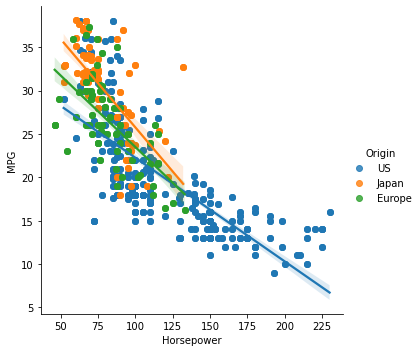

In [20]:
#make a scatterplot
sns.lmplot(x='Horsepower', y='MPG', data=df, 
           #fit_reg=False, #remove regression lines    #Test - remove the lines -working
           fit_reg=True, #keep regression lines
           hue='Origin')   #color by origin country

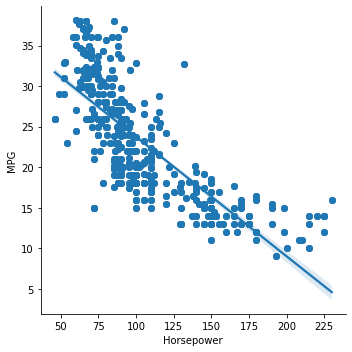

In [21]:
#make a scatterplot
sns.lmplot(x='Horsepower', y='MPG', data=df, 
           #fit_reg=False, #remove regression line  #Test - remove the line -working
           fit_reg=True) #keep regression line
           #hue='Origin')   #color by origin country

In [22]:
import statsmodels.formula.api as smf

In [23]:
#Get the result of summary for the MPG - Horsepower
result = smf.ols('MPG ~ Horsepower', data=df).fit()

In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1796.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          1.68e-236
Time:                        17:04:27   Log-Likelihood:                -3336.7
No. Observations:                1143   AIC:                             6677.
Df Residuals:                    1141   BIC:                             6688.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.4704      0.391     98.480      0.000      37.704      39.237
Horsepower    -0.1472      0.003    -42.379      0.000      -0.154      -0.140
==============================================================================
Omnibus:                       18.293   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.975
Skew:                           0.313   Prob(JB):                     7.58e-05
Kurtosis:                       2.912   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

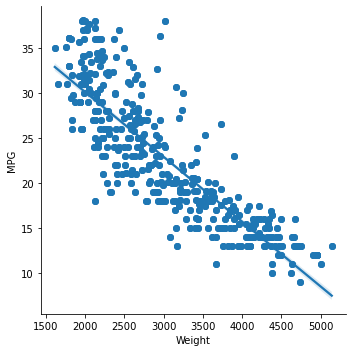

In [25]:
#make a scatterplot
sns.lmplot(x='Weight', y='MPG', data=df, 
           #fit_reg=False, #remove regression line
           fit_reg=True) #remove regression line
           #hue='Origin')   #color by origin country

In [26]:
#Get the result of summary for the MPG-Weight
result = smf.ols('MPG ~ Weight', data=df).fit()

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     2872.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          6.92e-314
Time:                        17:04:27   Log-Likelihood:                -3158.3
No. Observations:                1143   AIC:                             6321.
Df Residuals:                    1141   BIC:                             6331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.5426      0.419    106.182      0.000      43.720      45.366
Weight        -0.0072      0.000    -53.592      0.000      -0.007      -0.007
==============================================================================
Omnibus:                       44.317   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.235
Skew:                           0.434   Prob(JB):                     4.54e-12
Kurtosis:                       3.587   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

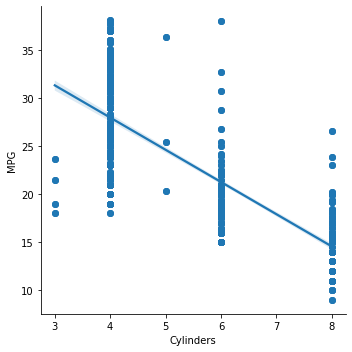

In [28]:
#make a scatterplot
sns.lmplot(x='Cylinders', y='MPG', data=df, 
           #fit_reg=False, #remove regression line
           fit_reg=True) #remove regression line
           #hue='Origin')   #color by origin country

In [29]:
#MPG-Cylinders
result = smf.ols('MPG ~ Cylinders', data=df).fit()

In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1986.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          4.62e-252
Time:                        17:04:27   Log-Likelihood:                -3300.9
No. Observations:                1143   AIC:                             6606.
Df Residuals:                    1141   BIC:                             6616.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3936      0.434     95.282      0.000      40.541      42.246
Cylinders     -3.3536      0.075    -44.567      0.000      -3.501      -3.206
==============================================================================
Omnibus:                       42.433   Durbin-Watson:                   1.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.523
Skew:                           0.425   Prob(JB):                     1.76e-11
Kurtosis:                       3.563   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#MPG-Cylinders+Displacement+Horsepower+Weight+Acceleration
result = smf.ols('MPG ~ Cylinders+Displacement+Horsepower+Weight+Acceleration', data=df).fit()

In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     626.9
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          9.88e-324
Time:                        17:04:27   Log-Likelihood:                -3120.7
No. Observations:                1143   AIC:                             6253.
Df Residuals:                    1137   BIC:                             6284.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       48.6825      1.384     35.170      0.000      45.967      51.398
Cylinders       -0.6274      0.208     -3.014      0.003      -1.036      -0.219
Displacement    -0.0020      0.005     -0.445      0.657      -0.011       0.007
Horsepower      -0.0530      0.008     -6.249      0.000      -0.070      -0.036
Weight          -0.0041      0.000     -9.787      0.000      -0.005      -0.003
Acceleration    -0.2589      0.067     -3.889      0.000      -0.389      -0.128
==============================================================================
Omnibus:                       45.573   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.584
Skew:                           0.443   Prob(JB):                     2.31e-12
Kurtosis:                       3.582   Cond. No.                     3.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#MPG-Cylinders+Displacement+Horsepower+Weight+Acceleration
#set y-interception = 0
result = smf.ols('MPG ~ Cylinders+Displacement+Horsepower+Weight+Acceleration-1', data=df).fit()

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    MPG   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              4333.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):                        0.00
Time:                        17:04:27   Log-Likelihood:                         -3541.4
No. Observations:                1143   AIC:                                      7093.
Df Residuals:                    1138   BIC:                                      7118.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Cylinders        2.1919      0.277      7.900      0.000       1.648       2.736
Displacement    -0.0629      0.006    -10.215      0.000      -0.075      -0.051
Horsepower       0.1395      0.009     14.898      0.000       0.121       0.158
Weight          -0.0059      0.001     -9.855      0.000      -0.007      -0.005
Acceleration     1.6805      0.054     31.206      0.000       1.575       1.786
==============================================================================
Omnibus:                       20.755   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.433
Skew:                           0.139   Prob(JB):                     5.50e-08
Kurtosis:                       3.791   Cond. No.                     5.49e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

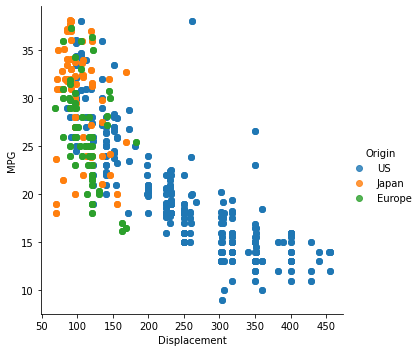

In [35]:
#make a scatterplot
sns.lmplot(x='Displacement', y='MPG', data=df, 
           fit_reg=False, #remove regression line
           hue='Origin')   #color by origin country

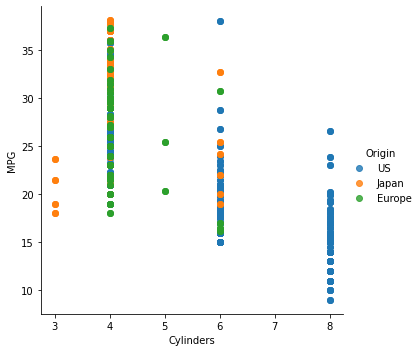

In [36]:
#make a scatterplot
sns.lmplot(x='Cylinders', y='MPG', data=df, 
           fit_reg=False, #remove regression line
           hue='Origin')   #color by origin country

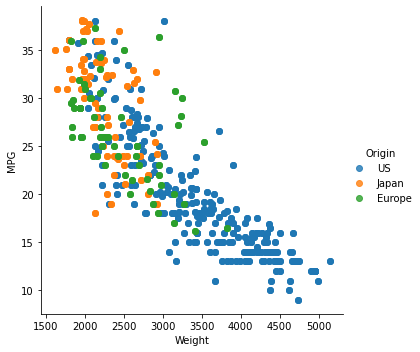

In [37]:
#make a scatterplot
sns.lmplot(x='Weight', y='MPG', data=df, 
           fit_reg=False, #remove regression line
           hue='Origin')   #color by origin country

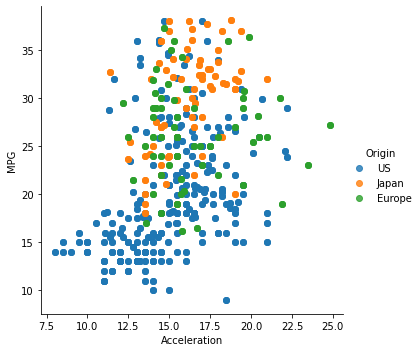

In [38]:
#make a scatterplot
sns.lmplot(x='Acceleration', y='MPG', data=df, 
           fit_reg=False, #remove regression line
           hue='Origin')   #color by origin country

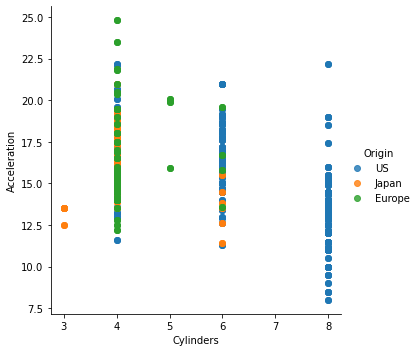

In [39]:
#remove regression line

#make a scatterplot
sns.lmplot(x='Cylinders', y='Acceleration', data=df, 
           fit_reg=False, 
           hue='Origin')   #color by origin country

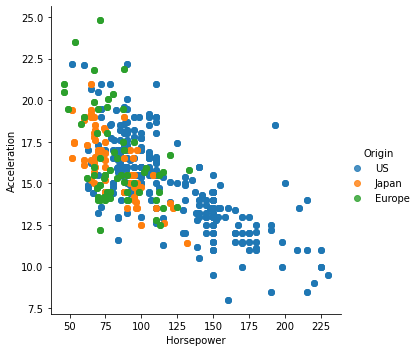

In [40]:
#make a scatterplot
sns.lmplot(x='Horsepower', y='Acceleration', data=df, 
           fit_reg=False, #remove regression line
           hue='Origin')   #color by origin country

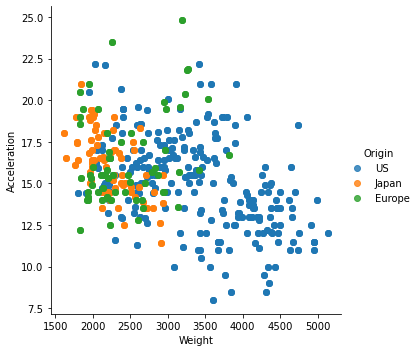

In [41]:
#make a scatterplot
sns.lmplot(x='Weight', y='Acceleration', data=df, 
           fit_reg=False, #remove regression line
           hue='Origin')   #color by origin country

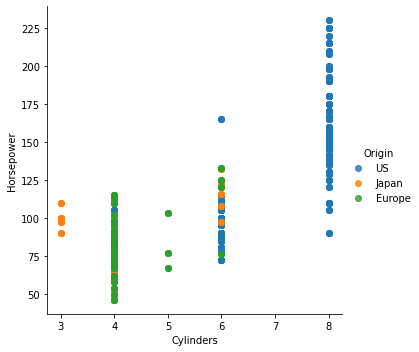

In [42]:
#make a scatterplot
sns.lmplot(x='Cylinders', y='Horsepower', data=df, 
           fit_reg=False, #remove regression line
           hue='Origin')   #color by origin country

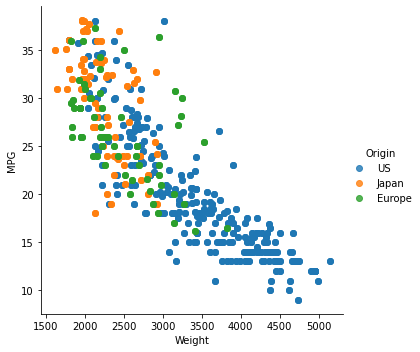

In [43]:
#add more details to scatterplot
sns.lmplot(x='Weight', y='MPG', data=df, 
           fit_reg=False, #remove regression line
           hue='Origin')   #color by evolution stage

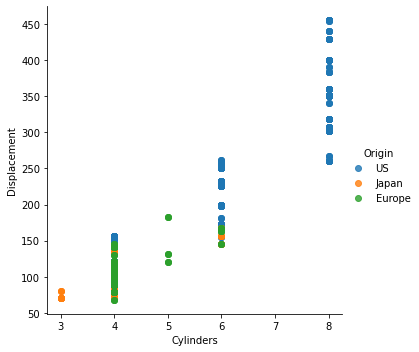

In [44]:
#add more details to scatterplot
sns.lmplot(x='Cylinders', y='Displacement', data=df, 
           fit_reg=False, #remove regression line
           hue='Origin')   #color by evolution stage

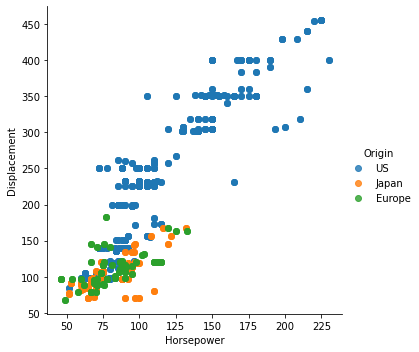

In [45]:
#add more details to scatterplot
sns.lmplot(x='Horsepower', y='Displacement', data=df, 
           fit_reg=False, #remove regression line
           hue='Origin')   #color by evolution stage

<b>EDA and Data Visualization - boxplot</b>

<AxesSubplot:>

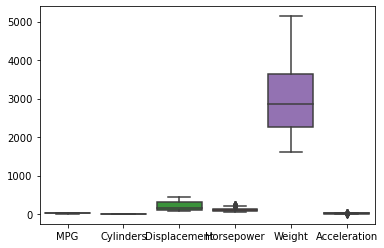

In [46]:
#boxplot showing stats for each characteristic
sns.boxplot(data=df)

In [47]:
#drop Model
#stats_df = df.drop(['Model'], axis=1)
#stats_df.head()

stats_df = df

<AxesSubplot:>

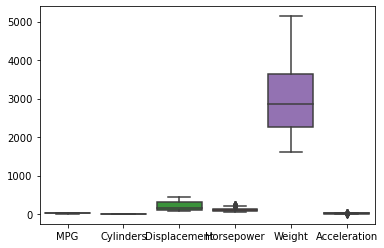

In [48]:
#boxplot for stats
sns.boxplot(data=stats_df)

<b>EDA and Data Visualization - violinplot</b>

<AxesSubplot:xlabel='Origin', ylabel='MPG'>

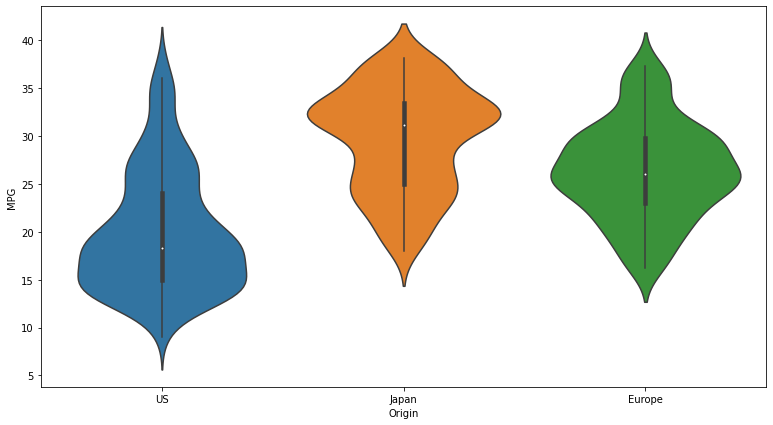

In [49]:
#change size of plot
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of attack power for each type
sns.violinplot(x='Origin', y='MPG', data=df)

<AxesSubplot:xlabel='Cylinders', ylabel='MPG'>

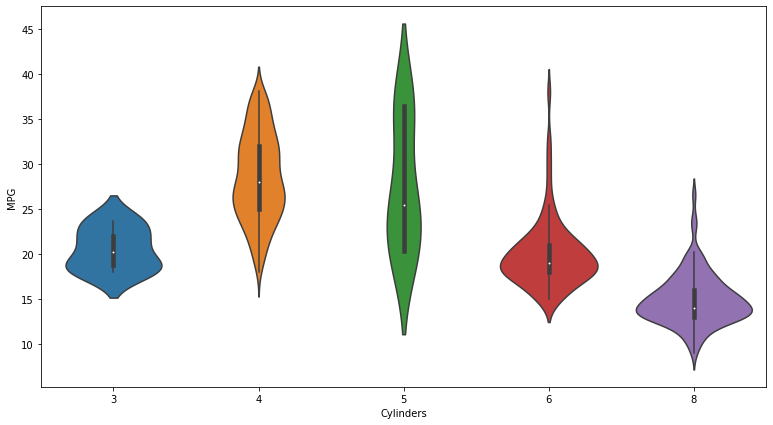

In [50]:
#change size of plot
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of attack power for each type
sns.violinplot(x='Cylinders', y='MPG', data=df)

In [51]:
#create color palette
#color Hex numbers are from Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)
origin_colors = ['#78C850',  # US
                    '#F08030',  # Europe
                    '#6890F0'  # Japan
                   ]

#create color palette
#color Hex numbers are from Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)
cylinder_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A040A0'  # Poison
                   ]

<AxesSubplot:xlabel='Origin', ylabel='Horsepower'>

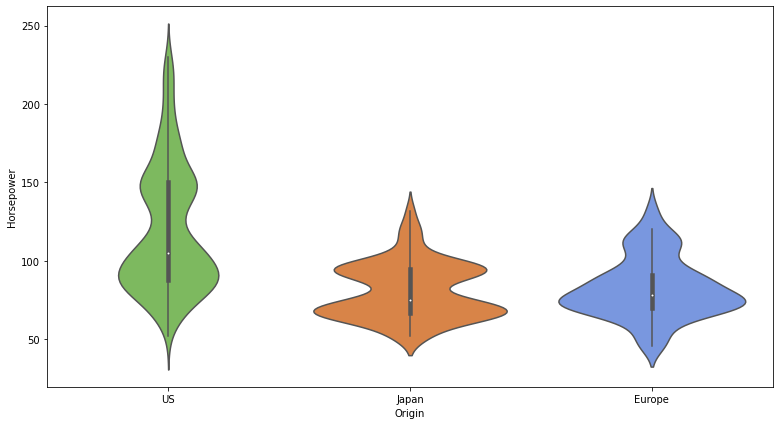

In [52]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Origin', y='Horsepower', data=df, palette=origin_colors)

<AxesSubplot:xlabel='Cylinders', ylabel='Horsepower'>

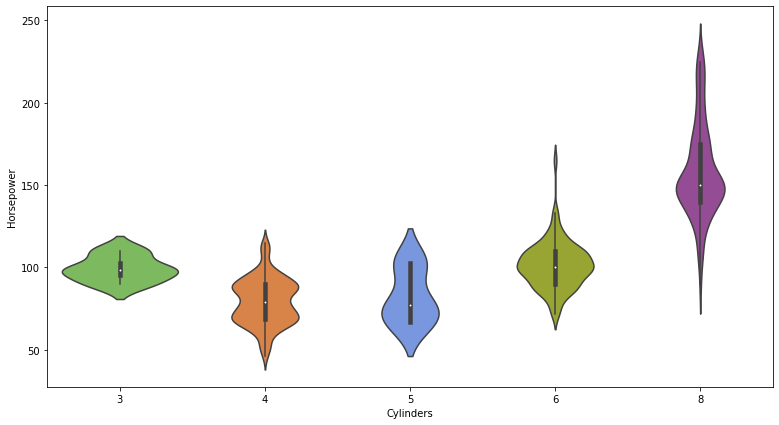

In [53]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Cylinders', y='Horsepower', data=df, palette=cylinder_colors)

<AxesSubplot:xlabel='Origin', ylabel='Acceleration'>

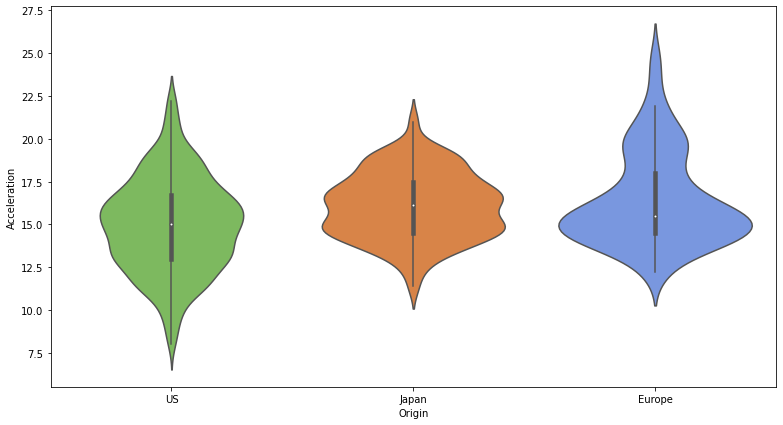

In [54]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Origin', y='Acceleration', data=df, palette=origin_colors)

<AxesSubplot:xlabel='Cylinders', ylabel='Acceleration'>

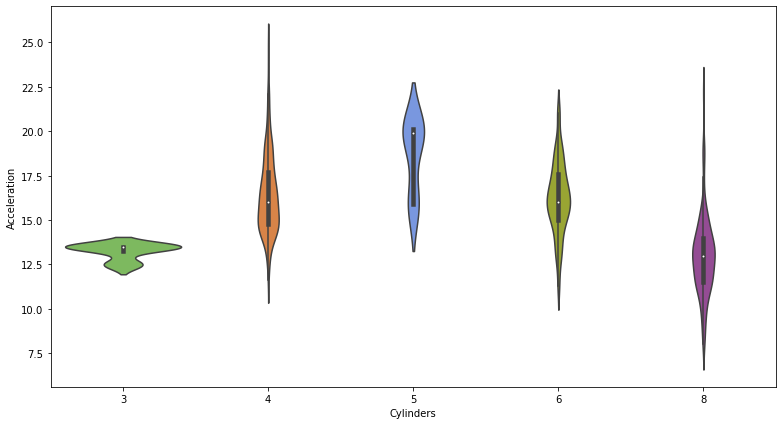

In [55]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Cylinders', y='Acceleration', data=df, palette=cylinder_colors)

<AxesSubplot:xlabel='Origin', ylabel='Weight'>

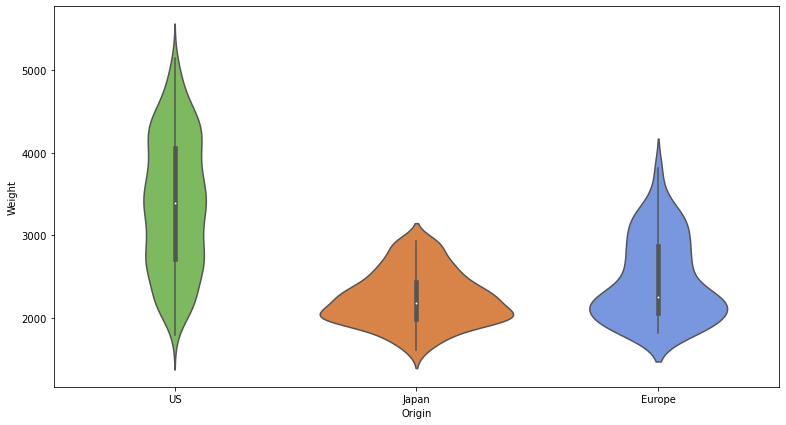

In [56]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Origin', y='Weight', data=df, palette=origin_colors)

<AxesSubplot:xlabel='Cylinders', ylabel='Weight'>

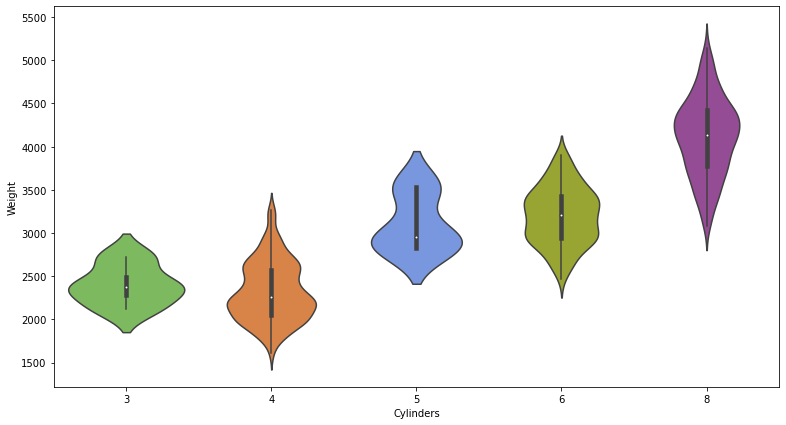

In [57]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Cylinders', y='Weight', data=df, palette=cylinder_colors)

<AxesSubplot:xlabel='Origin', ylabel='Cylinders'>

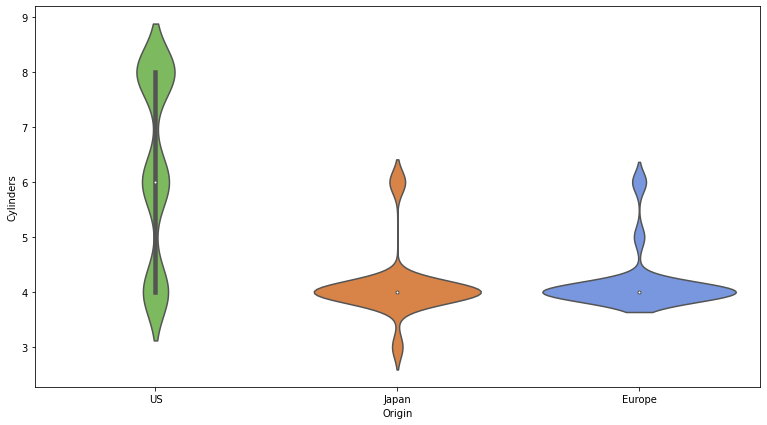

In [58]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Origin', y='Cylinders', data=df, palette=origin_colors)

<AxesSubplot:xlabel='Cylinders', ylabel='MPG'>

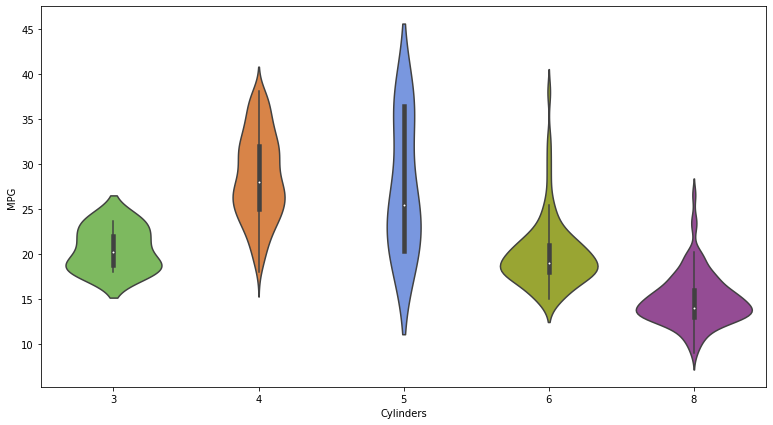

In [59]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Cylinders', y='MPG', data=df, palette=cylinder_colors)

<AxesSubplot:xlabel='Horsepower', ylabel='MPG'>

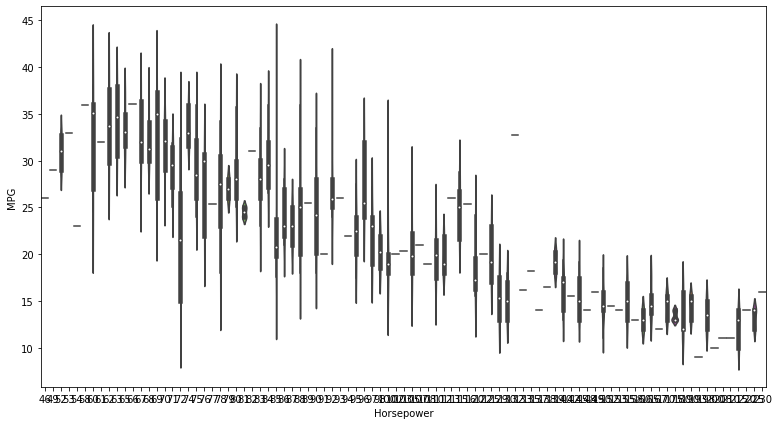

In [60]:
#violin plot with MPG-Horsepower
plt.subplots(figsize=(13,7))
sns.violinplot(x='Horsepower', y='MPG', data=df, palette=cylinder_colors)

<AxesSubplot:xlabel='Origin', ylabel='Displacement'>

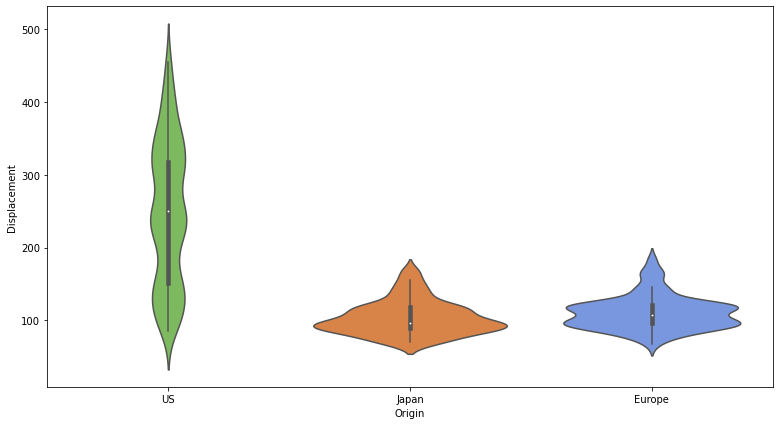

In [61]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Origin', y='Displacement', data=df, palette=origin_colors)

<AxesSubplot:xlabel='Cylinders', ylabel='Displacement'>

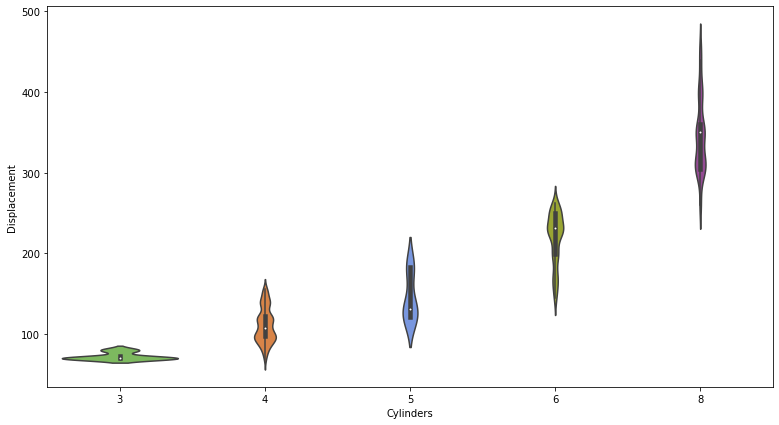

In [62]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Cylinders', y='Displacement', data=df, palette=cylinder_colors)

<b>EDA and Data Visualization - swarmplot</b>

C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Origin', ylabel='MPG'>

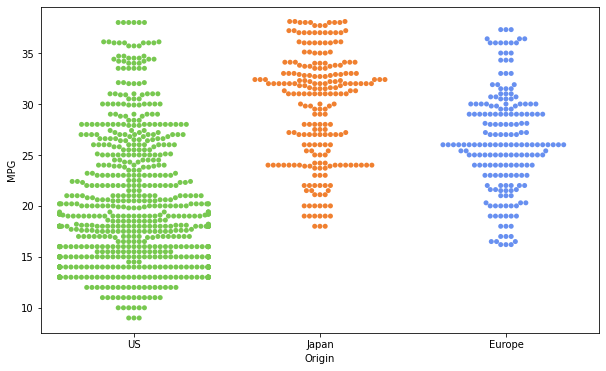

In [63]:
#swarm plot
plt.subplots(figsize=(10,6))
sns.swarmplot(x='Origin', y='MPG', data=df, palette=origin_colors)

C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Cylinders', ylabel='MPG'>

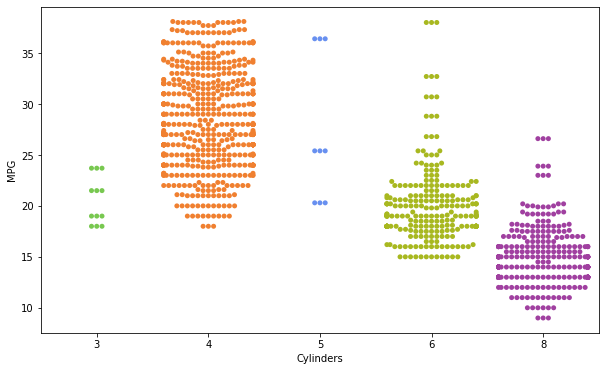

In [64]:
#swarm plot
plt.subplots(figsize=(10,6))
sns.swarmplot(x='Cylinders', y='MPG', data=df, palette=cylinder_colors)

C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.8% of the points

<AxesSubplot:xlabel='Horsepower', ylabel='MPG'>

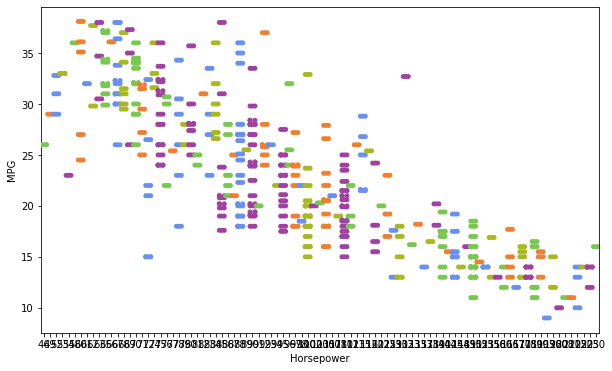

In [65]:
#swarm plot for MPG by Horsepower 
plt.subplots(figsize=(10,6))
sns.swarmplot(x='Horsepower', y='MPG', data=df, palette=cylinder_colors)

<b>EDA and Data Visualization - swarmplot combine a violin plot with a swarm plot</b>

C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'MPG by Origin')

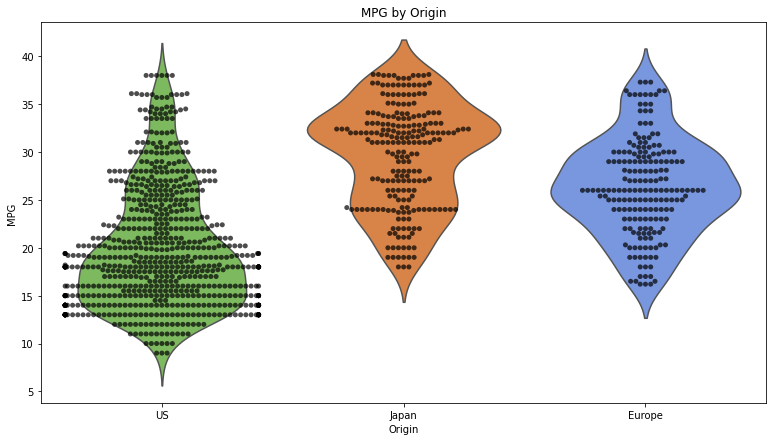

In [66]:
#combine a violin plot with a swarm plot
plt.figure(figsize=(13,7))
sns.violinplot(x='Origin',
               y='MPG',
               data=df,
               inner=None, #removes bars inside violin plot
               palette=origin_colors)

sns.swarmplot(x='Origin',
              y='MPG',
              data=df,
              color='k', #make points black
              alpha=0.7) #slightly transparent

plt.title('MPG by Origin')

C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'MPG by Cylinders')

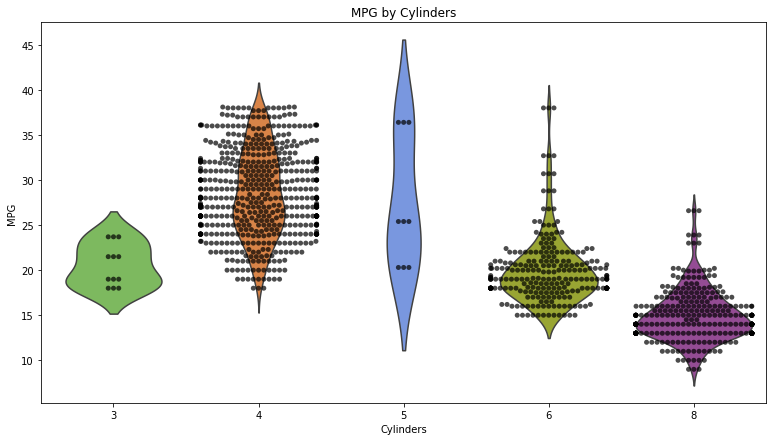

In [67]:
#combine a violin plot with a swarm plot
plt.figure(figsize=(13,7))
sns.violinplot(x='Cylinders',
               y='MPG',
               data=df,
               inner=None, #removes bars inside violin plot
               palette=cylinder_colors)

sns.swarmplot(x='Cylinders',
              y='MPG',
              data=df,
              color='k', #make points black
              alpha=0.7) #slightly transparent

plt.title('MPG by Cylinders')

<b>EDA and Data Visualization - heatmap</b>

<AxesSubplot:>

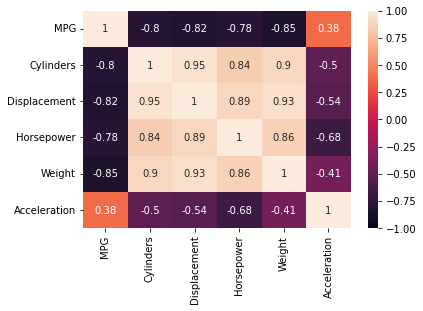

In [68]:
#show correlation of stats via heatmap
#corr = stats_df.corr()
corr = df.corr()
sns.heatmap(corr, vmin=-1, annot=True)

<b>EDA and Data Visualization - distplot</b>

C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MPG', ylabel='Density'>

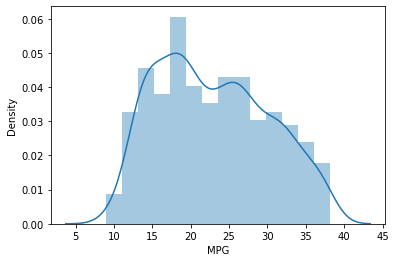

In [69]:
#create a histogram of the distribution of MPG
sns.distplot(df['MPG'])

<b>EDA and Data Visualization - countplot</b>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '8')])

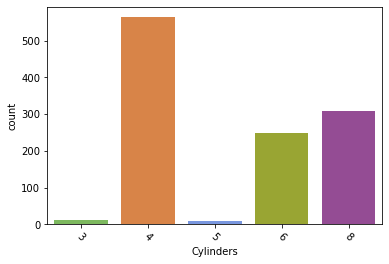

In [70]:
#create a bar plot of MPG frequency
sns.countplot(x='Cylinders',
              data=df, 
              palette=cylinder_colors)

plt.xticks(rotation=-45)

<b>EDA and Data Visualization - factorplot</b>

C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


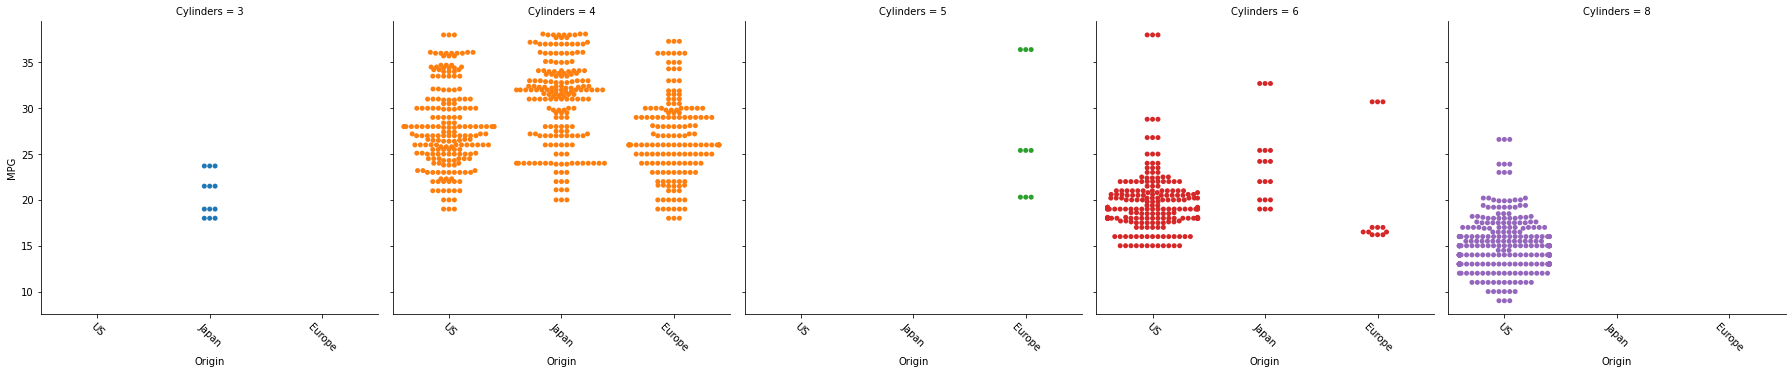

In [71]:
#scatterplot by origin (evolution level)
g = sns.factorplot(x='Origin', y='MPG',
                   data=df,
                   hue='Cylinders', 
                   col='Cylinders',
                   kind='swarm')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)

In [72]:
#creates a table of correlation values
#stats_df.corr()
df.corr()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
MPG,1.000000,-0.796957,-0.819711,-0.781986,-0.845981,0.382623
Cylinders,-0.796957,1.000000,0.949895,0.840144,0.895852,-0.500983
Displacement,-0.819711,0.949895,1.000000,0.894782,0.931252,-0.539336
Horsepower,-0.781986,0.840144,0.894782,1.000000,0.860802,-0.684429
Weight,-0.845981,0.895852,0.931252,0.860802,1.000000,-0.405727
Acceleration,0.382623,-0.500983,-0.539336,-0.684429,-0.405727,1.000000


In [73]:
#use this library to build a statistical test for linear regression
import statsmodels.formula.api as smf

In [74]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('MPG ~ Cylinders + Horsepower + Weight + Acceleration', data=df).fit()

In [75]:
#the summary will show the calculated values (slopes and y-intercept) for the linear regression formula
#the closer to 1 the r-squared value is, the better the fit of the linear regression line
#the p-value shows how statistically significant a predictive feature could be the model

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     784.1
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:04:44   Log-Likelihood:                -3120.8
No. Observations:                1143   AIC:                             6252.
Df Residuals:                    1138   BIC:                             6277.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       48.9140      1.282     38.150      0.000      46.398      51.430
Cylinders       -0.6894      0.155     -4.458      0.000      -0.993      -0.386
Horsepower      -0.0540      0.008     -6.584      0.000      -0.070      -0.038
Weight          -0.0042      0.000    -11.095      0.000      -0.005      -0.003
Acceleration    -0.2555      0.066     -3.865      0.000      -0.385      -0.126
==============================================================================
Omnibus:                       44.301   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.830
Skew:                           0.437   Prob(JB):                     5.56e-12
Kurtosis:                       3.570   Cond. No.                     3.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
result = smf.ols('MPG ~ Cylinders + Horsepower + Weight + Acceleration + Displacement - 1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    MPG   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              4333.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):                        0.00
Time:                        17:04:44   Log-Likelihood:                         -3541.4
No. Observations:                1143   AIC:                                      7093.
Df Residuals:                    1138   BIC:                                      7118.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Cylinders        2.1919      0.277      7.900      0.000       1.648       2.736
Horsepower       0.1395      0.009     14.898      0.000       0.121       0.158
Weight          -0.0059      0.001     -9.855      0.000      -0.007      -0.005
Acceleration     1.6805      0.054     31.206      0.000       1.575       1.786
Displacement    -0.0629      0.006    -10.215      0.000      -0.075      -0.051
==============================================================================
Omnibus:                       20.755   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.433
Skew:                           0.139   Prob(JB):                     5.50e-08
Kurtosis:                       3.791   Cond. No.                     5.49e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<AxesSubplot:xlabel='Origin', ylabel='count'>

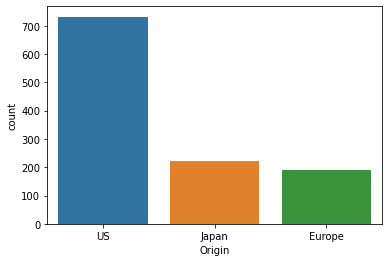

In [78]:
#bar chart of survival status count
sns.countplot(x='Origin', data=df)

<AxesSubplot:xlabel='Cylinders', ylabel='count'>

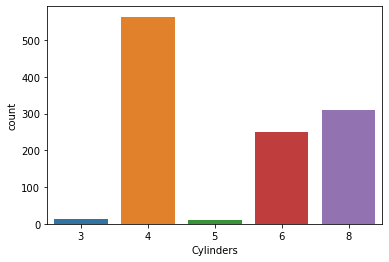

In [79]:
#bar chart of survival status count
sns.countplot(x='Cylinders', data=df)

C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Origin', ylabel='Cylinders'>

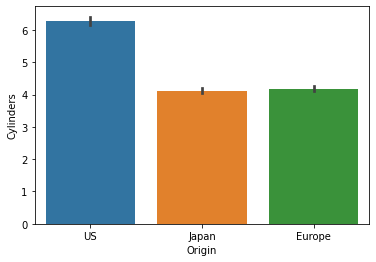

In [80]:
#survival status by sex
sns.barplot('Origin', 'Cylinders', data=df)

C:\Users\wrxio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cylinders', ylabel='MPG'>

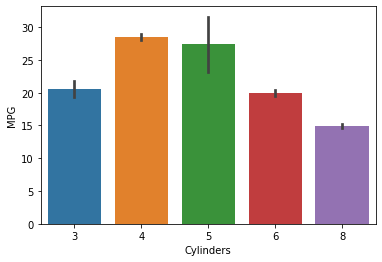

In [81]:
#survival status by sex
sns.barplot('Cylinders', 'MPG', data=df)

<b>EDA and Data Visualization - kdeplot</b>

[Text(0.5, 0, 'MPG')]

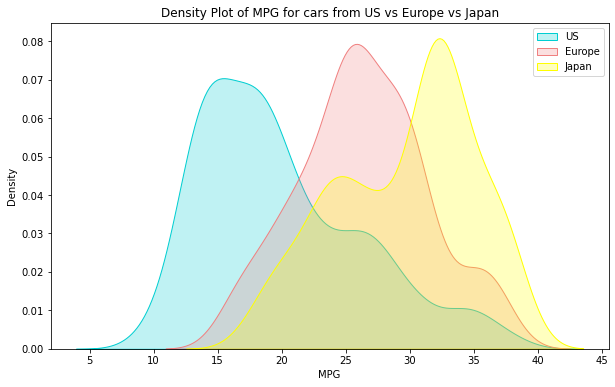

In [82]:
#plot MPG by origin
plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['MPG'][df['Origin'] == 'US'], #cars from US
                 color="darkturquoise",
                 shade=True)

sns.kdeplot(df['MPG'][df['Origin'] == 'Europe'], #cars from Europe
            color="lightcoral",
            shade=True)


sns.kdeplot(df['MPG'][df['Origin'] == 'Japan'], #cars from Japan
            color="yellow",
            shade=True)

plt.legend (['US', 'Europe', 'Japan'])
plt.title("Density Plot of MPG for cars from US vs Europe vs Japan")

ax.set(xlabel='MPG')
#plt.show()

In [83]:
#find columns that have missing values
df.isnull().sum()

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Origin          0
dtype: int64

<b>EDA and Data Visualization with Matplotlib and Seaborn</b>

In [84]:
# Basic Plots with Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

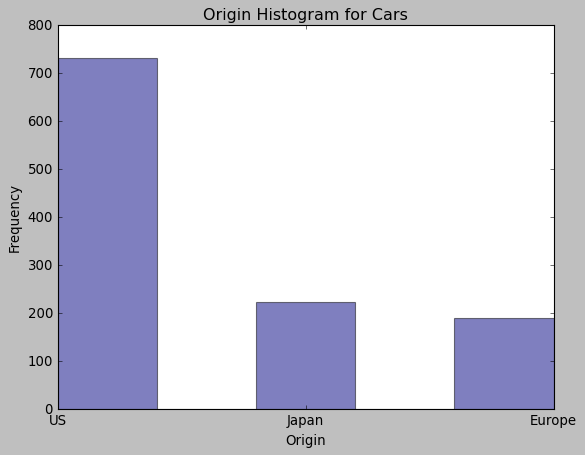

In [85]:
# Origin Histogram
plt.hist(df.Origin, bins=5, facecolor='navy', alpha=0.5)
plt.title('Origin Histogram for Cars')
plt.xlabel('Origin')
plt.ylabel('Frequency')
plt.show()

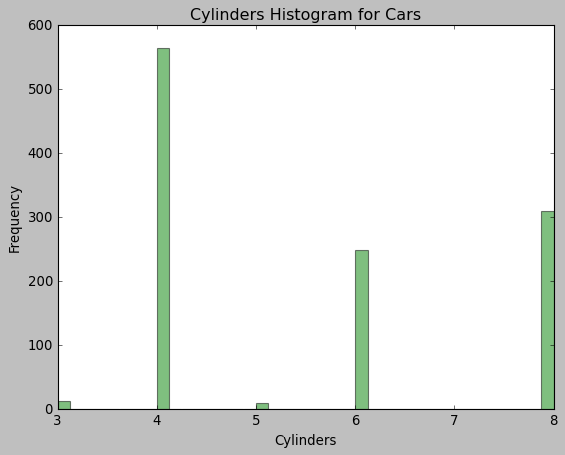

In [86]:
# Age Histogram
plt.hist(df.Cylinders, bins=40, facecolor='green', alpha=0.5)
plt.title('Cylinders Histogram for Cars')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.show()

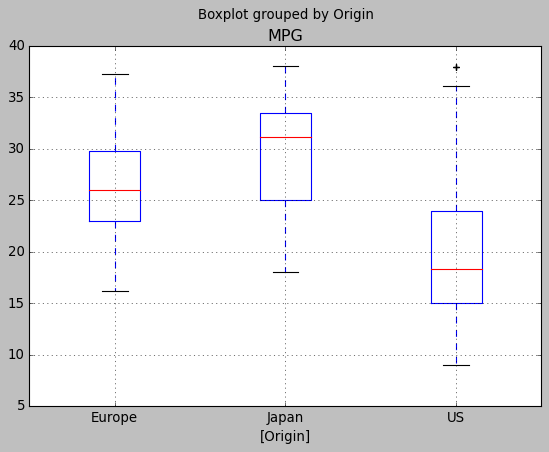

In [87]:
# Boxplot
boxplot = df.boxplot(column=['MPG' ], by = ['Origin'])

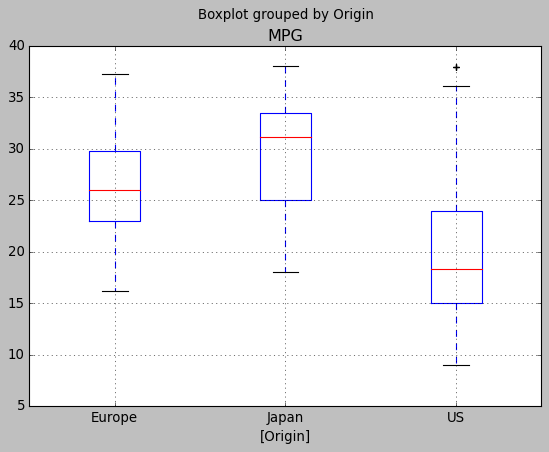

In [88]:
# Boxplot
boxplot = df.boxplot(column=['MPG' ], by = ['Origin'])

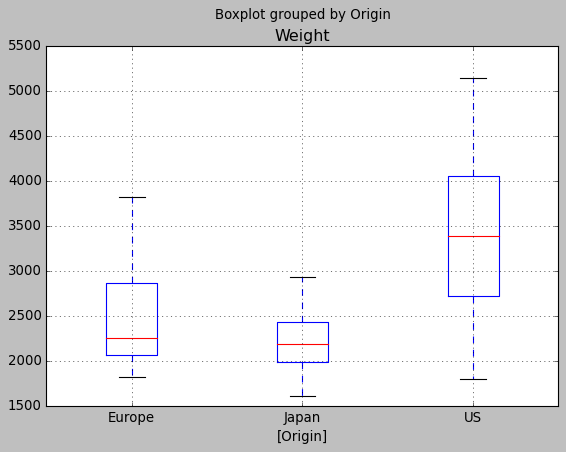

In [89]:
# Boxplot
boxplot = df.boxplot(column=['Weight' ], by = ['Origin'])

<AxesSubplot:xlabel='Cylinders', ylabel='MPG'>

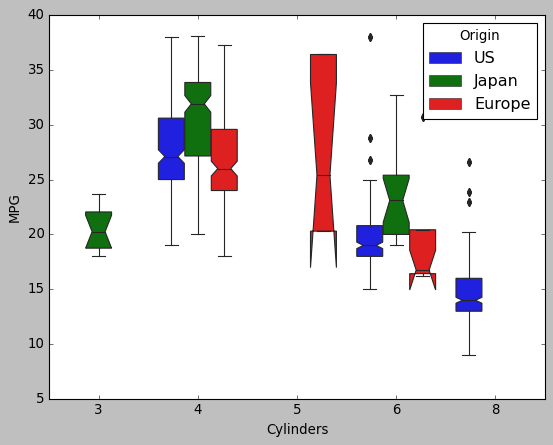

In [90]:
#Importing required modules
import seaborn as sns
import pandas as ppd
 
 
sns.boxplot(data = df , x = 'Cylinders' , y = 'MPG' , hue = 'Origin' , notch = True )

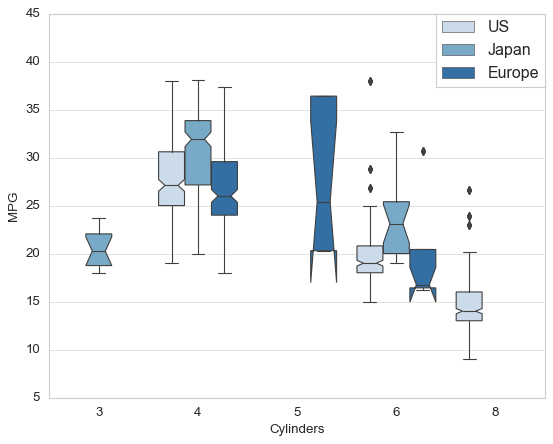

In [91]:
sns.set_style("whitegrid")
sns.boxplot(data = df , x = 'Cylinders' , y = 'MPG' , hue = 'Origin', notch = True, palette="Blues")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1,1),borderaxespad=0)
plt.ylim(5, 45)
plt.show()

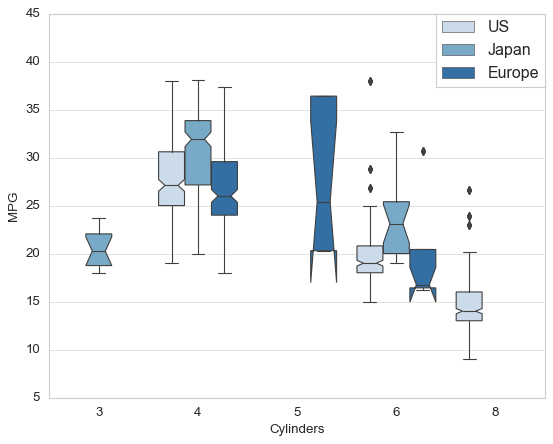

In [92]:
sns.set_style("whitegrid")
sns.boxplot(data = df , x = 'Cylinders' , y = 'MPG' , hue = 'Origin', notch = True, palette="Blues")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1,1),borderaxespad=0)
plt.ylim(5, 45)
plt.show()

<b>Simulated Nonparametric Inference of the Median, Mean and CI for Quantitative Variable - Bond Amount</b>

In [93]:
# Median Bootstrapping - Sample 40
bootstrap = pd.DataFrame({'df': [df.sample(40, replace = True).MPG.median() for i in range (380)]})

In [94]:
bootstrap.head()

,df
0,26.15
1,21.05
2,25.15
3,20.75
4,20.20


In [95]:
bootstrap.median()

df    22.075
dtype: float64

In [96]:
df.MPG.median()

22.0

In [97]:
# Median Bootstrapping 2 - Sample 1000
bootstrap2 = pd.DataFrame({'df': [df.sample(1000, replace = True).MPG.median() for i in range (1000)]})

In [98]:
bootstrap2.median()

df    22.0
dtype: float64

In [99]:
# Median Bootstrapping 3 - Sample 5000
bootstrap3 = pd.DataFrame({'df': [df.sample(5000, replace = True).MPG.median() for i in range (5000)]})

In [100]:
bootstrap3.median()

df    22.0
dtype: float64

In [101]:
# Median Bootstrapping 3 - Sample 10%: 117
bootstrap_10pct = pd.DataFrame({'df': [df.sample(117, replace = True).MPG.median() for i in range (1176)]})

In [102]:
bootstrap_10pct.median()

df    22.0
dtype: float64

In [103]:
# Dataset Mean
df.MPG.mean()

22.900262467191606

In [104]:
# Mean Bootstrapping - Sample 100
bootstrap4 = pd.DataFrame({'df': [df.sample(100, replace = True).MPG.mean() for i in range (5000)]})
bootstrap4.mean()

df    22.906551
dtype: float64

In [105]:
# Mean Bootstrapping 2 - Sample 1000
bootstrap5 = pd.DataFrame({'df': [df.sample(1000, replace = True).MPG.mean() for i in range (5000)]})
bootstrap5.mean()

df    22.898582
dtype: float64

In [106]:
# Mean Bootstrapping 3 - Sample 5000
bootstrap6 = pd.DataFrame({'df': [df.sample(5000, replace = True).MPG.mean() for i in range (5000)]})
bootstrap6.mean()

df    22.895975
dtype: float64

<b>Confidence Intervals</b>

In [107]:
# 95% Confidence Interval - Median Bootstrapping - 100 Samples
conf_int1 = np.percentile(bootstrap, [2.5, 97.5]) # The middle 95% interval
conf_int1

array([19. , 25.7])

In [108]:
# 95% Confidence Interval - Median Bootstrapping - 1000 Samples
conf_int2 = np.percentile(bootstrap2, [2.5, 97.5]) # The middle 95% interval
conf_int2

array([21.1, 23. ])

In [109]:
# 95% Confidence Interval - Median Bootstrapping - 5000 Samples
conf_int3 = np.percentile(bootstrap3, [2.5, 97.5]) # The middle 95% interval
conf_int3

array([22. , 22.5])

In [110]:
# 95% Confidence Interval - Median Original Dataset
conf_int_df = np.percentile(df.MPG.median(), [2.5, 97.5]) # The middle 95% interval
conf_int_df

array([22., 22.])

In [111]:
# 95% Confidence Interval - Mean Bootstrapping - 100 Samples
conf_int4 = np.percentile(bootstrap4, [2.5, 97.5]) # The middle 95% interval
conf_int4

array([21.506975, 24.315025])

In [112]:
# 95% Confidence Interval - Mean Bootstrapping - 1000 Samples
conf_int5 = np.percentile(bootstrap5, [2.5, 97.5]) # The middle 95% interval
conf_int5

array([22.44829, 23.3704 ])

In [113]:
# 95% Confidence Interval - Mean Bootstrapping - 5000 Samples
conf_int6 = np.percentile(bootstrap6, [2.5, 97.5]) # The middle 95% interval
conf_int6

array([22.6993065, 23.0959205])

In [114]:
# 95% Confidence Interval - Mean Bootstrapping - Original Dataset
conf_int_dfmean = np.percentile(df.MPG.mean(), [2.5, 97.5]) # The middle 95% interval
conf_int_dfmean

array([22.90026247, 22.90026247])

In [115]:
df_bootstrap = pd.DataFrame(bootstrap, index=[0])
print(df_bootstrap)

      df
0  26.15


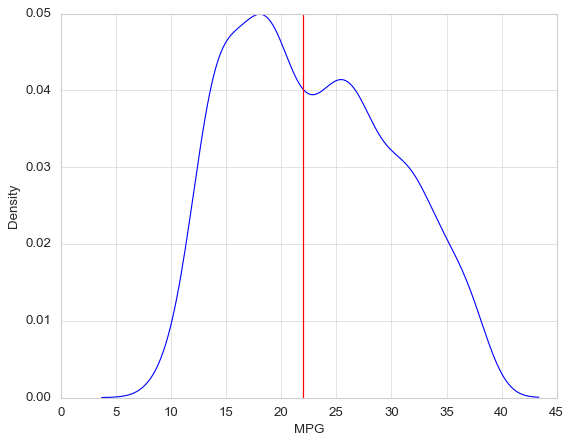

In [116]:
# Confidence Interval Graph for Dataset - Median
import seaborn as sns
sns.kdeplot(df.MPG)
for endpoint in conf_int_df:
    plt.axvline(endpoint, color='red')

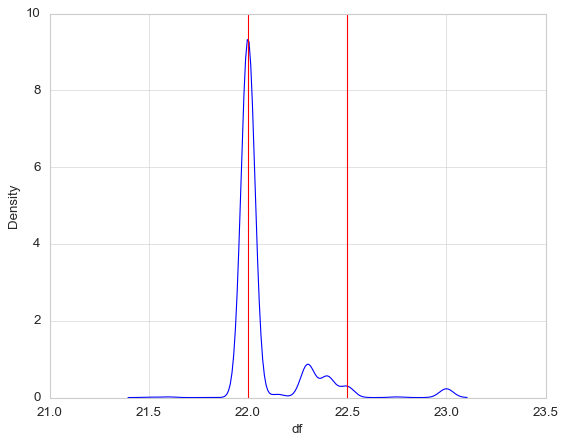

In [117]:
# Confidence Interval Graph for Bootstrap Sample - Median
import seaborn as sns
sns.kdeplot(bootstrap3.df)
for endpoint in conf_int3:
    plt.axvline(endpoint, color='red')

In [118]:
#Bootstrapping from all entries in dataset
median_boot_samples = []
for i in range(1000):
                df.MPG = np.random.choice(df.MPG, 1143)
                median_boot_samples.append(df.MPG.median())
        
np.median(median_boot_samples)

26.6

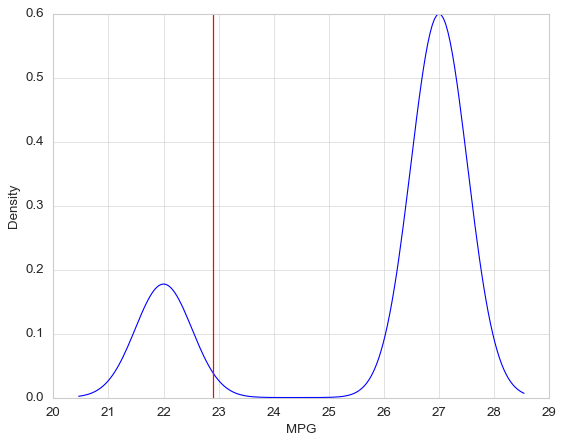

In [119]:
# Confidence Interval Graph for Dataset Mean
import seaborn as sns
sns.kdeplot(df.MPG)
for endpoint in conf_int_dfmean:
    plt.axvline(endpoint, color='red')

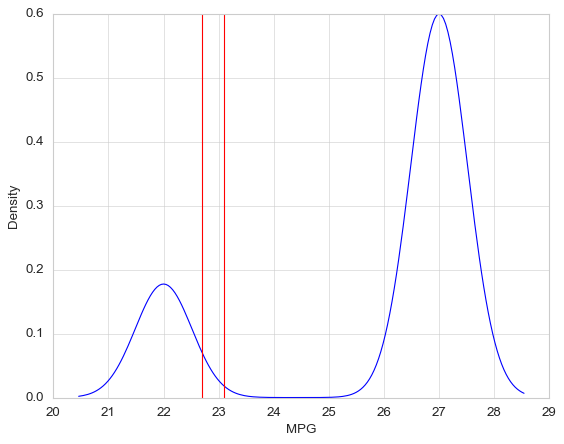

In [120]:
# Confidence Interval Graph for Bootstrap Mean - Sample 5000
import seaborn as sns
sns.kdeplot(df.MPG)
for endpoint in conf_int6:
    plt.axvline(endpoint, color='red')
    

In [121]:
median_boot_samples = []
for i in range(1000):
                df.MPG = np.random.choice(df.MPG, 1143)
                median_boot_samples.append(df.MPG.median())
        
np.median(median_boot_samples)

27.0